<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/main/HELPpy/notebooks/csegs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=https://github.com/giordamaug/HELP/blob/main/HELPpy/notebooks/csegs.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

### 6. Subtract pan-tissue EGs from those of the chosen tissue
Uncommon context-specific EGs (ucsEGs) for a chosen tissue (here `tissueK = 'Kidney'`) are obtained by subtracting the 
pan-tissue EGs computed in the previous step (`df_common`) by the EGs identified for the chosen tissue.

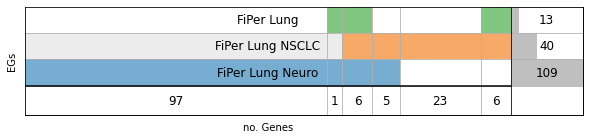

In [6]:
import pandas as pd
import numpy as np
import os
method = 'FiPer'
#Identification of EGs in Kidney tissue (as in Example 1)
filename1 = "HELP_Lung_Neuroendocrine_Tumor_threeClasses.csv"
filename2 = "HELP_Lung_Non-Small_Cell_Lung_Cancer_threeClasses.csv"
filename3 = "HELP_Lung.csv"
filename = "HELP_PanCancer_threeClasses.csv"
filename1 = "ADAM_LungNeuro.csv"
filename2 = "ADAM_NSCLC.csv"
filename3 = "ADAM_lung.csv"
filename = "ADAM_PANCancer.csv"
filename1 = "Fiper_consensus_LungNeuro.csv"
filename2 = "Fiper_consensus_NSCLC.csv"
filename3 = "Fiper_consensus_lung.csv"
filename = "Fiper_consensus_PANCancer.csv"

df_labe11 = pd.read_csv(filename1,index_col=0)
df_labe12 = pd.read_csv(filename2,index_col=0)
df_labe13 = pd.read_csv(filename3,index_col=0)
df_common = pd.read_csv(filename,index_col=0)
EG1 = df_labe11[df_labe11['label'] == 'E'].index.values
EG2 = df_labe12[df_labe12['label'] == 'E'].index.values
EG3 = df_labe13[df_labe13['label'] == 'E'].index.values
cEG = df_common[df_common['label']=='E'].index.values
ucs_EG1 = np.setdiff1d(EG1, cEG)
ucs_EG2 = np.setdiff1d(EG2, cEG)
ucs_EG3 = np.setdiff1d(EG3, cEG)
from HELPpy.visualization.plot import svenn_intesect
sv1 = svenn_intesect([set(ucs_EG1),set(ucs_EG2), set(ucs_EG3)], labels=[f'{method} Lung Neuro', f'{method} Lung NSCLC', f'{method} Lung'], ylabel='EGs', figsize=(10,2))

[]

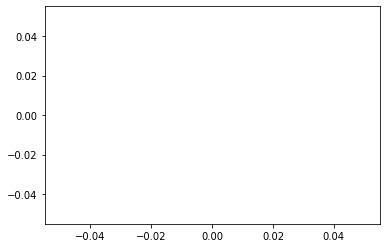

In [16]:
import matplotlib.pyplot as plt

##### Visualizing the obtained results
Show the supervenn plot of pan-tissue EGs, Kidney EGs and Kidney ucsEGs.

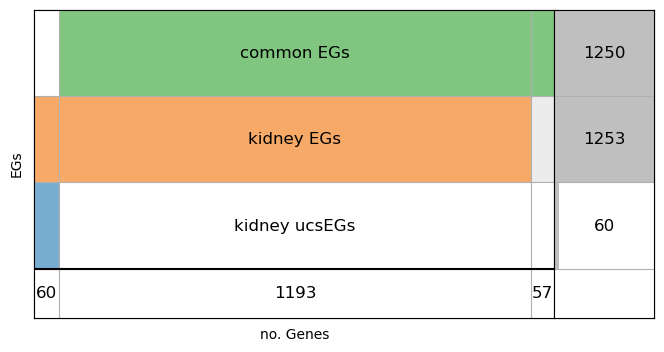

In [10]:
from HELPpy.visualization.plot import svenn_intesect
svenn_intesect([set(ucs_EG_kidney),set(EG_kidney), set(cEG)], labels=['kidney ucsEGs', 'kidney EGs', 'common EGs'], ylabel='EGs', figsize=(8,4))

The plot shows that the Kidney tissue shares 1193 EGs with all the other tissues (over a total of 1250 ucEGs) and has 60 ucsEGs.

Show the supervenn plot of Kidney ucsEGs against Lung ucsEGs.

The plot shows that the Kidney and Lung tissues share 5 ucsEGs. 